# Ejemplo de regresión logisitica

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [105]:
iris = datasets.load_iris()

In [106]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
X = iris['data'][:, 3:]
X_c = np.c_[np.ones((len(iris['target']), 1)), X]

In [108]:
#Detect iris virginica
y = (iris['target'] == 2).astype(int).reshape(len(iris['target']), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Apliación del descenso de gradiente

In [109]:
def sigmoid(z):
    return 1 / (1 + np. exp(- z))

In [110]:
eta = 0.5
n_iterations = 100000
m = len(y)

In [111]:
theta = np.random.randn(2, 1)
theta

array([[0.95297915],
       [0.06227422]])

In [112]:
for i in range(n_iterations):
    gradients = (1/m) * (X_c.T @ (sigmoid(X_c @ theta) - y))
    theta = theta - gradients

theta

array([[-21.12564008],
       [ 12.94750723]])

1.6336336336336337


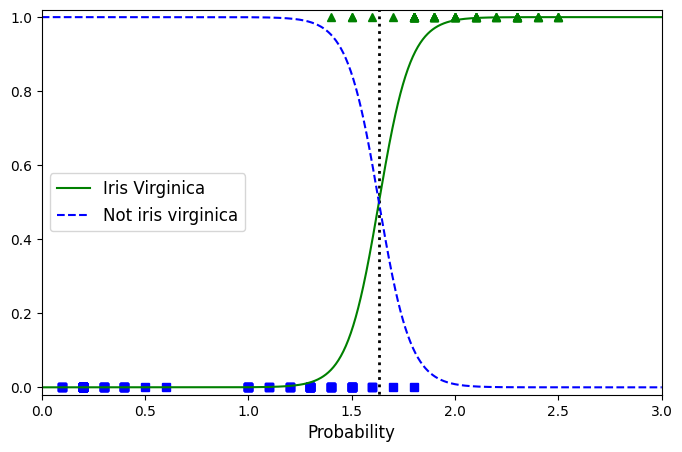

In [113]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new_c = np.c_[np.ones((1000, 1)), X_new]
y_proba = sigmoid(theta.T @ X_new_c.T)

decision_Boundary = X_new[y_proba.reshape(-1, 1) >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba.T, 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba.T, 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Aplicando la libreria sklearn la clase LogisticRegression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression(C = 10**10)
model.fit(X, y.ravel())

LogisticRegression(C=10000000000)

[1.63363363]


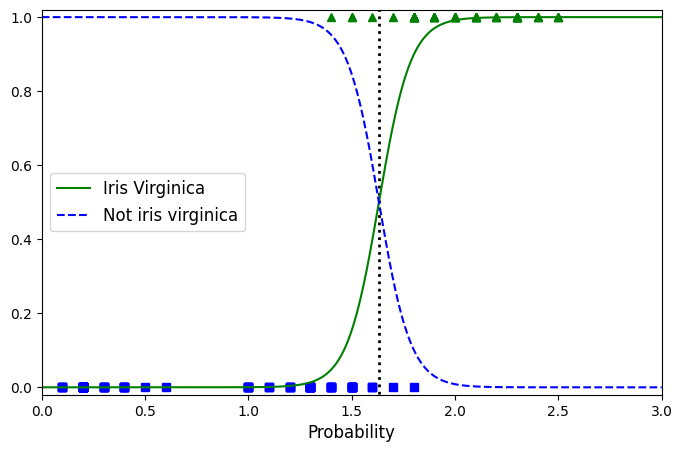

In [116]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

decision_Boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba[:, 1], 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba[:, 1], 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [117]:
y_proba

array([[9.99999999e-01, 6.68990990e-10],
       [9.99999999e-01, 6.95514100e-10],
       [9.99999999e-01, 7.23088756e-10],
       ...,
       [2.18558172e-08, 9.99999978e-01],
       [2.10223556e-08, 9.99999979e-01],
       [2.02206778e-08, 9.99999980e-01]])

In [118]:
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(int)

In [119]:
model = LogisticRegression(C=10**10)
model.fit(X, y)

LogisticRegression(C=10000000000)

`model.intercept_` contiene $\theta_0$

In [120]:
model.intercept_

array([-45.27248302])

`model.coef_` contiene $\theta_1$ en adelante

In [121]:
model.coef_

array([[ 5.75452052, 10.44681114]])

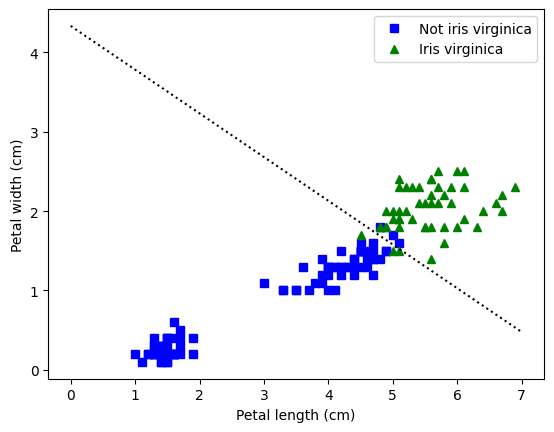

In [122]:
y_proba = model.predict_proba(X)

left_right = np.array([0, 7])
boundary = -(model.intercept_[0] + model.coef_[0][0] * left_right) / model.coef_[0][1]

plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label = "Not iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label = "Iris virginica")

plt.plot(left_right, boundary, "k:")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()

plt.show()

Incluso funciona para mútiples clases (3, en este ejemplo):

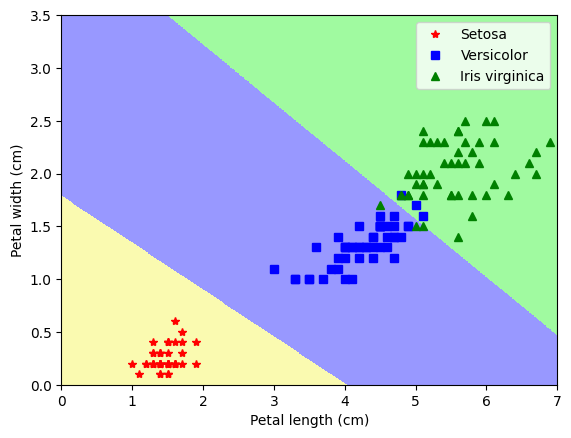

In [123]:
X = iris["data"][:, (2, 3)]
# y = (iris["target"] == 2).astype(int)
y = iris["target"]


model = LogisticRegression(C=10**10)
model.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 500).reshape(-1, 1)) 

y_proba = model.predict_proba(X)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = model.predict(X_new)
zz = y_predict.reshape(x0.shape)

left_right = np.array([0, 7])
boundary = -(model.intercept_[0] + model.coef_[0][0] * left_right) / model.coef_[0][1]

from matplotlib.colors import ListedColormap

custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)

# plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label = "Not iris virginica")
# plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label = "Iris virginica")
plt.plot(X[y == 0, 0], X[y == 0, 1], "r*", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label = "Iris virginica")


# plt.plot(left_right, boundary, "k:")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.axis([0, 7, 0, 3.5])

plt.show()

# Con imágenes

In [124]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

mnist["DESCR"]


/home/felipe/Documents/uady/aprendizaje-automatico/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [125]:
X, y = mnist["data"], mnist["target"]

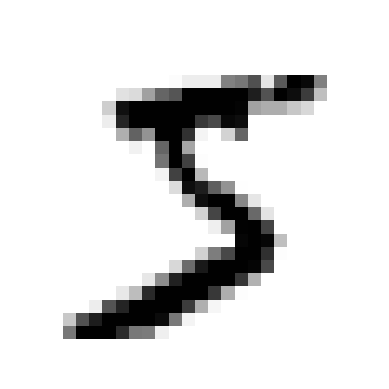

In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

single_digit = X[0]
single_digit_image = single_digit.reshape(28, 28)

plt.imshow(single_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [127]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size, image_size) for image in images]
    
    n_rows = (len(images) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

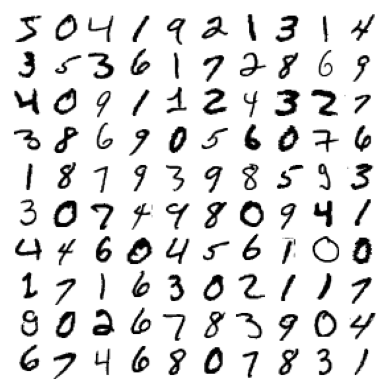

In [128]:
plot_images_matrix(X[:100], 28, 10)

In [129]:
y = y.astype(int)

x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [130]:
from sklearn.linear_model import SGDClassifier

In [131]:
y_train_for_5 = y_train == 5

In [132]:
model = SGDClassifier(loss="log_loss", random_state=55)
model.fit(x_train, y_train_for_5)

SGDClassifier(loss='log_loss', random_state=55)

In [133]:
model.predict(x_test[:10])

array([False, False, False, False, False, False, False,  True, False,
       False])

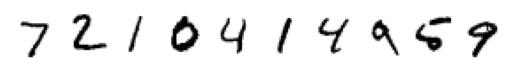

In [134]:
plot_images_matrix(x_test[:10], 28, 10)

# Cross validation

In [42]:
from sklearn.model_selection import cross_val_score 
cross_val_score(model, X, y==5, cv=3, scoring="accuracy")

array([0.96687238, 0.92825612, 0.95328505])

In [43]:
from sklearn.base import BaseEstimator

class NeverFiveClassifier(BaseEstimator):
    def fit(self, x, y=None):
        return self
    
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=int)
    
never_five_classifier = NeverFiveClassifier()
cross_val_score(never_five_classifier, X, y==5, cv=3, scoring="accuracy")

array([0.91137396, 0.9087987 , 0.90927013])

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 

%time y_only_five_predicted = cross_val_predict(model, X, y==5, cv=3)

CPU times: user 22.1 s, sys: 3.85 s, total: 25.9 s
Wall time: 21.3 s


In [102]:
from sklearn.metrics import confusion_matrix 

class ConfusionMatrix():
    def __init__(self, y, yp):
        cm = confusion_matrix(y, yp)
        self.precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        self.recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        self.f1 = 2 / (1 / self.precision + 1 / self.recall)

In [103]:
conf_mat = ConfusionMatrix(y==5, y_only_five_predicted)
conf_mat.recall, conf_mat.precision, conf_mat.f1

(0.8728021542848091, 0.66836487142164, 0.757024112111012)